### 10. Using conda environment in M2

In M2, there are certain package preinstalled in existing Python3 kernel. However, it is not possible to update or to install additional package. It is therefore, encouraged to create your own conda environment and make it available in Jupyter Notebook.

- Go to Terminal. From hpc.smu.edu, you can click on cluster\ManeFrame II Shell access or Terminal from existing node
- Requesting a compute node if you do not have one
- Load python/3 module
- Create conda environment:
```conda env create -n myenv python=3.8 --y```
- After done, activate the newly created environment
```source activate myenv```
- Install any library that you want:
```pip install seaborn```
```conda install jupyter```

- Create kernel for Jupyter Notebook
```python -m ipykernel install --user --name myenv --display-name "MyENV"```



### 11. Plotting in Python
There are many different packages providing plotting system for Python.

- The core plotting package is Matplotlib, introduced in 2003 and gives you more control over your plots
- Seaborn is an abstraction layer on top of Matplotlib; You can write a shorter code but having a nicer plot than Matplotlib. Seaborn can be compared to ggplot2 in R.
- Other: Plotly, Bokeh, Altair, Pygal and their discussion can be found [here](https://opensource.com/article/20/4/plot-data-python)

#### How to display plot in Jupyter Notebook
You can visualize plot in Jupyter Notebook using ```%matplotlib notebook``` or ```%matplotlib inline``` inline magic commands.



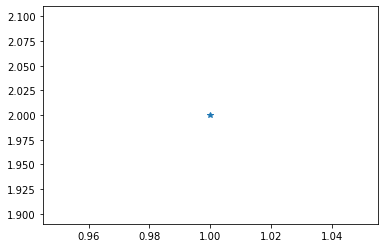

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(1,2,'*')

Plot parameter:
* ```plt```: state-based plotting interface similar to MATLAB
* data-plotting functions: <code>plt.plot(), plt.bar(), plt.scatter(), plt.hist(), etc.</code>
* plot-customization functions: <code>plt.xlim(), plt.ylim(), plt.xlabel(), plt.ylabel(), plt.title(), etc.</code>
* depending on configuration, may need to issue <code>plt.show()</code> to get plot to appear

#### More control over plot using Matplotlib


(0.0, 5.0, 0.0, 5.0)

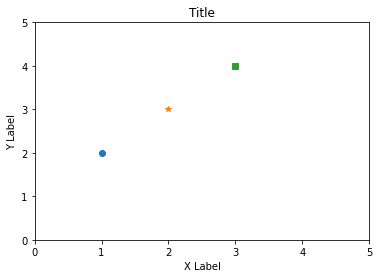

In [3]:
# Design the plot
plt.figure()

# Start plotting
plt.plot(1,2,'o')
plt.plot(2,3,'*')
plt.plot(3,4,"s")

# Label and Title:
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')

# Get current axes
ax = plt.gca()
#Set axis property to range (0, 5)
ax.axis([0,5,0,5])

#### Subplot 

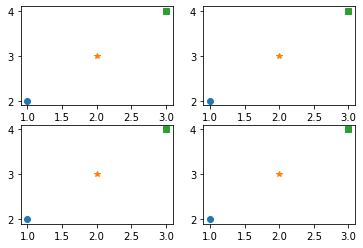

In [4]:
plt.subplot(2,2,1)
plt.plot(1,2,'o')
plt.plot(2,3,'*')
plt.plot(3,4,"s")

plt.subplot(2,2,2)
plt.plot(1,2,'o')
plt.plot(2,3,'*')
plt.plot(3,4,"s")

plt.subplot(2,2,3)
plt.plot(1,2,'o')
plt.plot(2,3,'*')
plt.plot(3,4,"s")

plt.subplot(2,2,4)
plt.plot(1,2,'o')
plt.plot(2,3,'*')
plt.plot(3,4,"s")

#### Plotting from Pandas DataFrame

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vuminhtue/SMU_Python_Visualization/master/data/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='hwy', ylabel='cty'>

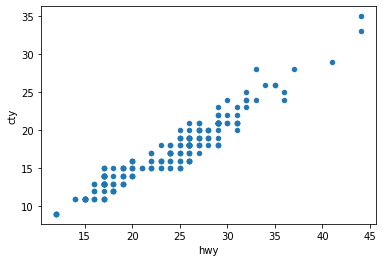

In [6]:
df.plot.scatter(x='hwy',y='cty')

<AxesSubplot:xlabel='hwy', ylabel='cty'>

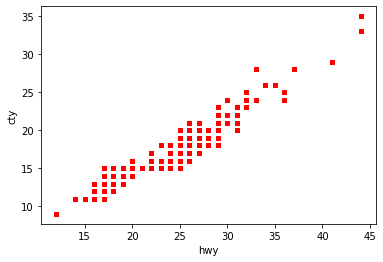

In [7]:
df.plot.scatter(x='hwy',y='cty',color='r',marker="s")


## Using Seaborn

In [8]:
import seaborn as sns
print(sns.__version__)

0.11.2


#### Scatter plot

[Text(0.5, 0, 'Highway (mpg)'),
 Text(0, 0.5, 'City (mpg)'),
 Text(0.5, 1.0, 'Highway vs City Fuel Consumption')]

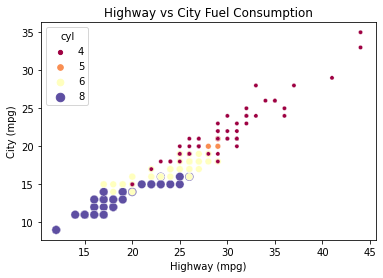

In [39]:
%matplotlib inline
ax = sns.scatterplot(x="hwy",y="cty",hue="cyl",size="cyl",data=df,palette="Spectral")
ax.set(xlabel='Highway (mpg)',
       ylabel='City (mpg)',
       title='Highway vs City Fuel Consumption')

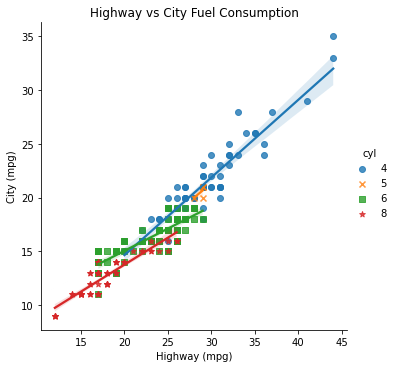

In [10]:
ax = sns.lmplot(x="hwy",y="cty",hue="cyl", markers=["o", "x","s","*"],data=df)
ax.set(xlabel='Highway (mpg)',
       ylabel='City (mpg)',
       title='Highway vs City Fuel Consumption')

#### Boxplot

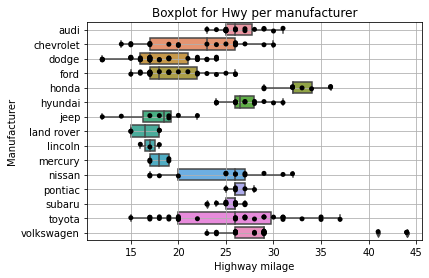

In [18]:
ax = sns.boxplot(x="hwy",y="manufacturer",data=df)
ax = sns.stripplot(x="hwy",y="manufacturer",data=df,color="black")
ax.set(ylabel='Manufacturer',
       xlabel='Highway milage',
       title='Boxplot for Hwy per manufacturer')
ax.grid()   

#### Violin plot


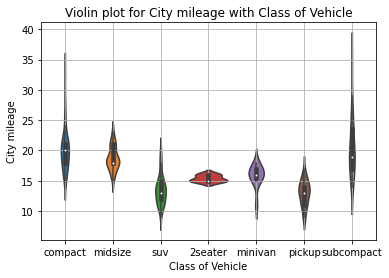

In [38]:
ax = sns.violinplot(x="class",y="cty",data=df)
ax.set(xlabel='Class of Vehicle',
      ylabel='City mileage',
       title='Violin plot for City mileage with Class of Vehicle')
ax.grid()

#### Histogram

[Text(0.5, 0, 'Engine Displacement'),
 Text(0, 0.5, 'Frequency Count'),
 Text(0.5, 1.0, 'Histogram with fixed bins')]

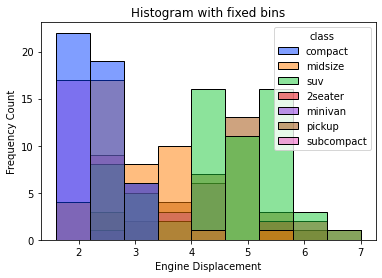

In [20]:
ax = sns.histplot(x="displ", bins=9, hue="class", data=df,palette = "bright")
ax.set(xlabel='Engine Displacement',
       ylabel='Frequency Count',
       title='Histogram with fixed bins')

#### Jointplot

/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


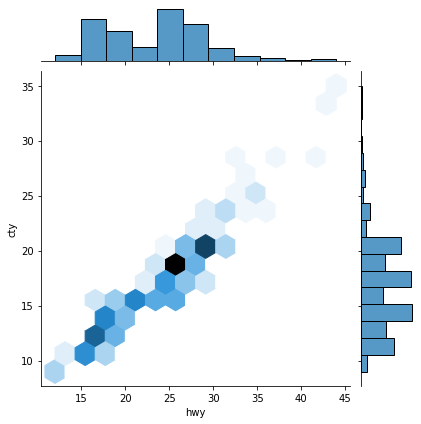

In [21]:
sns.jointplot("hwy", "cty",data=df, kind="hex")


/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


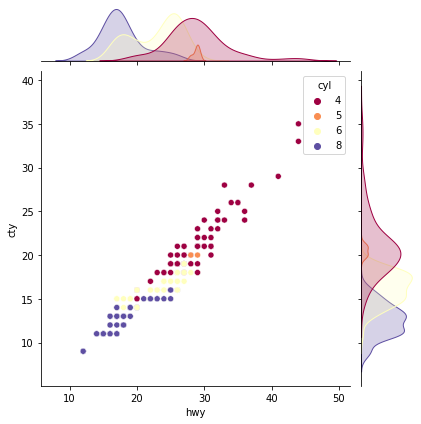

In [37]:
sns.jointplot("hwy", "cty",hue="cyl",data=df,palette="Spectral")


#### Heatmap


In [24]:
df1 = df.groupby(['manufacturer','cyl'])['hwy'].mean().reset_index()


In [25]:
df1 = df1.pivot('manufacturer','cyl',"hwy")


Text(33.0, 0.5, 'Cylinder')

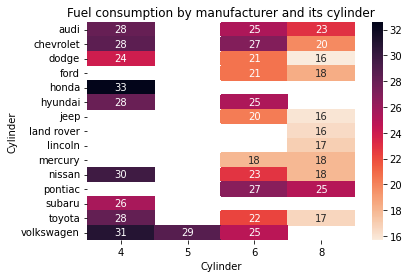

In [36]:
sns.heatmap(df1,annot=True,cmap='rocket_r')
plt.title("Fuel consumption by manufacturer and its cylinder")
plt.xlabel("Cylinder")
plt.ylabel("Cylinder")

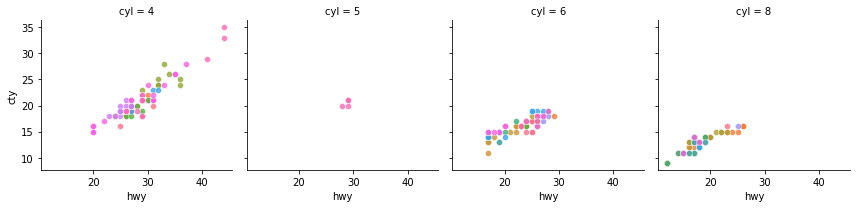

In [47]:
g=sns.FacetGrid(df,col='cyl',hue="manufacturer")
g.map(sns.scatterplot, "hwy","cty",alpha=.8)



In [ ]:
g=sns.FacetGrid(df,col='cyl',hue="manufacturer")
g.map(sns.barplot, "hwy","cty",alpha=.8)

In [48]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


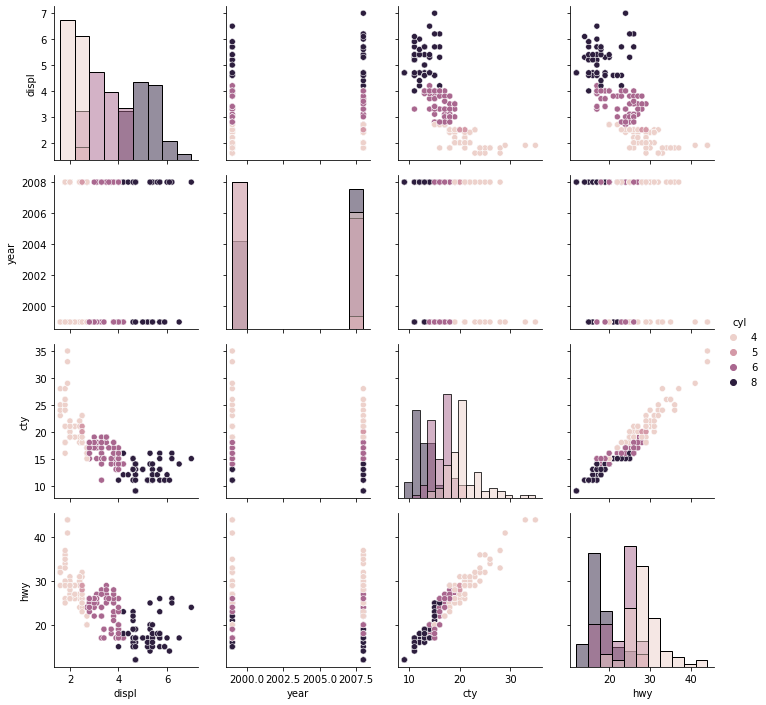

In [50]:
g = sns.PairGrid(df, hue="cyl")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()